## STopover_imageST:  
#### How to preprocess cell-level anndata to grid-based anndata (Xenium)

### Load STopover & Prepare

In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc

In [2]:
from STopover import STopover_imageST

### Load Already Preprocessed-Annotated LUAD Xenium dataset

https://www.10xgenomics.com/datasets/human-lung-cancer-preview-data-xenium-human-multi-tissue-and-cancer-panel-1-standard

##### Load saved STopover object for cell-type specific analysis

In [3]:
save_dir = './results/Xenium_LUAD'
os.makedirs(save_dir, exist_ok=True)

In [ ]:
help(STopover_imageST)

In [5]:
sp_adata_cell = sc.read_h5ad(os.path.join(save_dir, 'sp_grid_celltype_interact_adata_cell_uns.h5ad'))

In [6]:
sp_adata_cell.obs

,cell_id,array_col,array_row,n_counts,Cell_subtype,grid_array_col,grid_array_row
aaaanamo-1,aaaanamo-1,72.845871,849.649963,53.0,mo-Mac,0,29
aaabfigf-1,aaabfigf-1,96.823967,861.536377,119.0,Lymphatic ECs,0,29
aaabkdpm-1,aaabkdpm-1,118.609566,852.812805,150.0,Lymphatic ECs,1,29
aaackcjc-1,aaackcjc-1,34.003616,857.918091,49.0,COL14A1+ matrix FBs,0,29
aaadajdo-1,aaadajdo-1,148.912018,844.489319,44.0,mo-Mac,1,29
...,...,...,...,...,...,...,...
oikdcdpk-1,oikdcdpk-1,9103.792969,2588.266846,83.0,Treg,85,89
oikdkded-1,oikdkded-1,9114.743164,2594.548340,34.0,Myofibroblasts,85,89
oikdnkno-1,oikdnkno-1,9149.015625,2593.347900,52.0,COL13A1+ matrix FBs,85,89
oikdofbi-1,oikdofbi-1,9150.145508,2568.765869,32.0,Smooth muscle cells,85,88


In [7]:
# x_centroid & y_centroid in micrometer scale
# Resize the bin to have 55 micrometer unit
x_n_bin = (sp_adata_cell.obs['array_col'].max() // 55).astype(int)
y_n_bin = (sp_adata_cell.obs['array_row'].max() // 55).astype(int)
x_n_bin, y_n_bin

(194, 52)

In [8]:
sp_adata = STopover_imageST(sp_adata=sp_adata_cell, 
                            annotate_sp_adata = False, grid_sp_adata = True,
                            sc_celltype_colname = 'Cell_subtype', 
                            ST_type='xenium', grid_method='cell', annot_method='tacco', sc_norm_total=1e3,
                            x_bins=x_n_bin, y_bins=y_n_bin, min_size=20, fwhm=2.5, thres_per=30, save_path=save_dir)

End of creating image-based ST cell-level anndata: 0.13 seconds
End of annotating image-based ST cell-level anndata: 0.13 seconds
End of grid-based aggregation of xenium: 0.13 seconds
End of generating grid-based count matrix: 0.79 seconds
End of generating grid-based cell type abundance metadata: 0.96 seconds
End of generating grid-based image-based ST anndata: 0.99 seconds


In [9]:
sp_adata

STopover_imageST object with n_obs × n_vars = 7943 × 377
    obs: 'array_col', 'array_row', 'Activated DCs', 'Alveolar Mac', 'B lymphocytes_ns', 'CD141+ DCs', 'CD163+CD14+ DCs', 'CD1c+ DCs', 'CD207+CD1a+ LCs', 'CD4+ Th', 'CD8 low T', 'CD8+/CD4+ Mixed Th', 'COL13A1+ matrix FBs', 'COL14A1+ matrix FBs', 'Cytotoxic CD8+ T', 'EPCs', 'Endothelial cells_ns', 'Epithelial cells_ns', 'Exhausted CD8+ T', 'Exhausted Tfh', 'Fibroblasts_ns', 'Follicular B cells', 'GC B cells in the DZ', 'GC B cells in the LZ', 'Lymphatic ECs', 'MALT B cells', 'MAST', 'Mesothelial cells', 'Monocytes', 'Myeloid cells_ns', 'Myofibroblasts', 'NK', 'NK cells_ns', 'Naive CD4+ T', 'Naive CD8+ T', 'Pericytes', 'Plasma cells', 'Pleural Mac', 'Smooth muscle cells', 'Stalk-like ECs', 'T lymphocytes_ns', 'Tip-like ECs', 'Treg', 'Tumor ECs', 'mo-Mac', 'pDCs', 'tS1', 'tS2', 'tS3'
    uns: 'tx_by_cell_grid', 'x_bins', 'y_bins', 'ST_type', 'grid_method', 'sc_celltype_colname', 'transcript_colname', 'sc_norm_total', 'min_counts', 'm

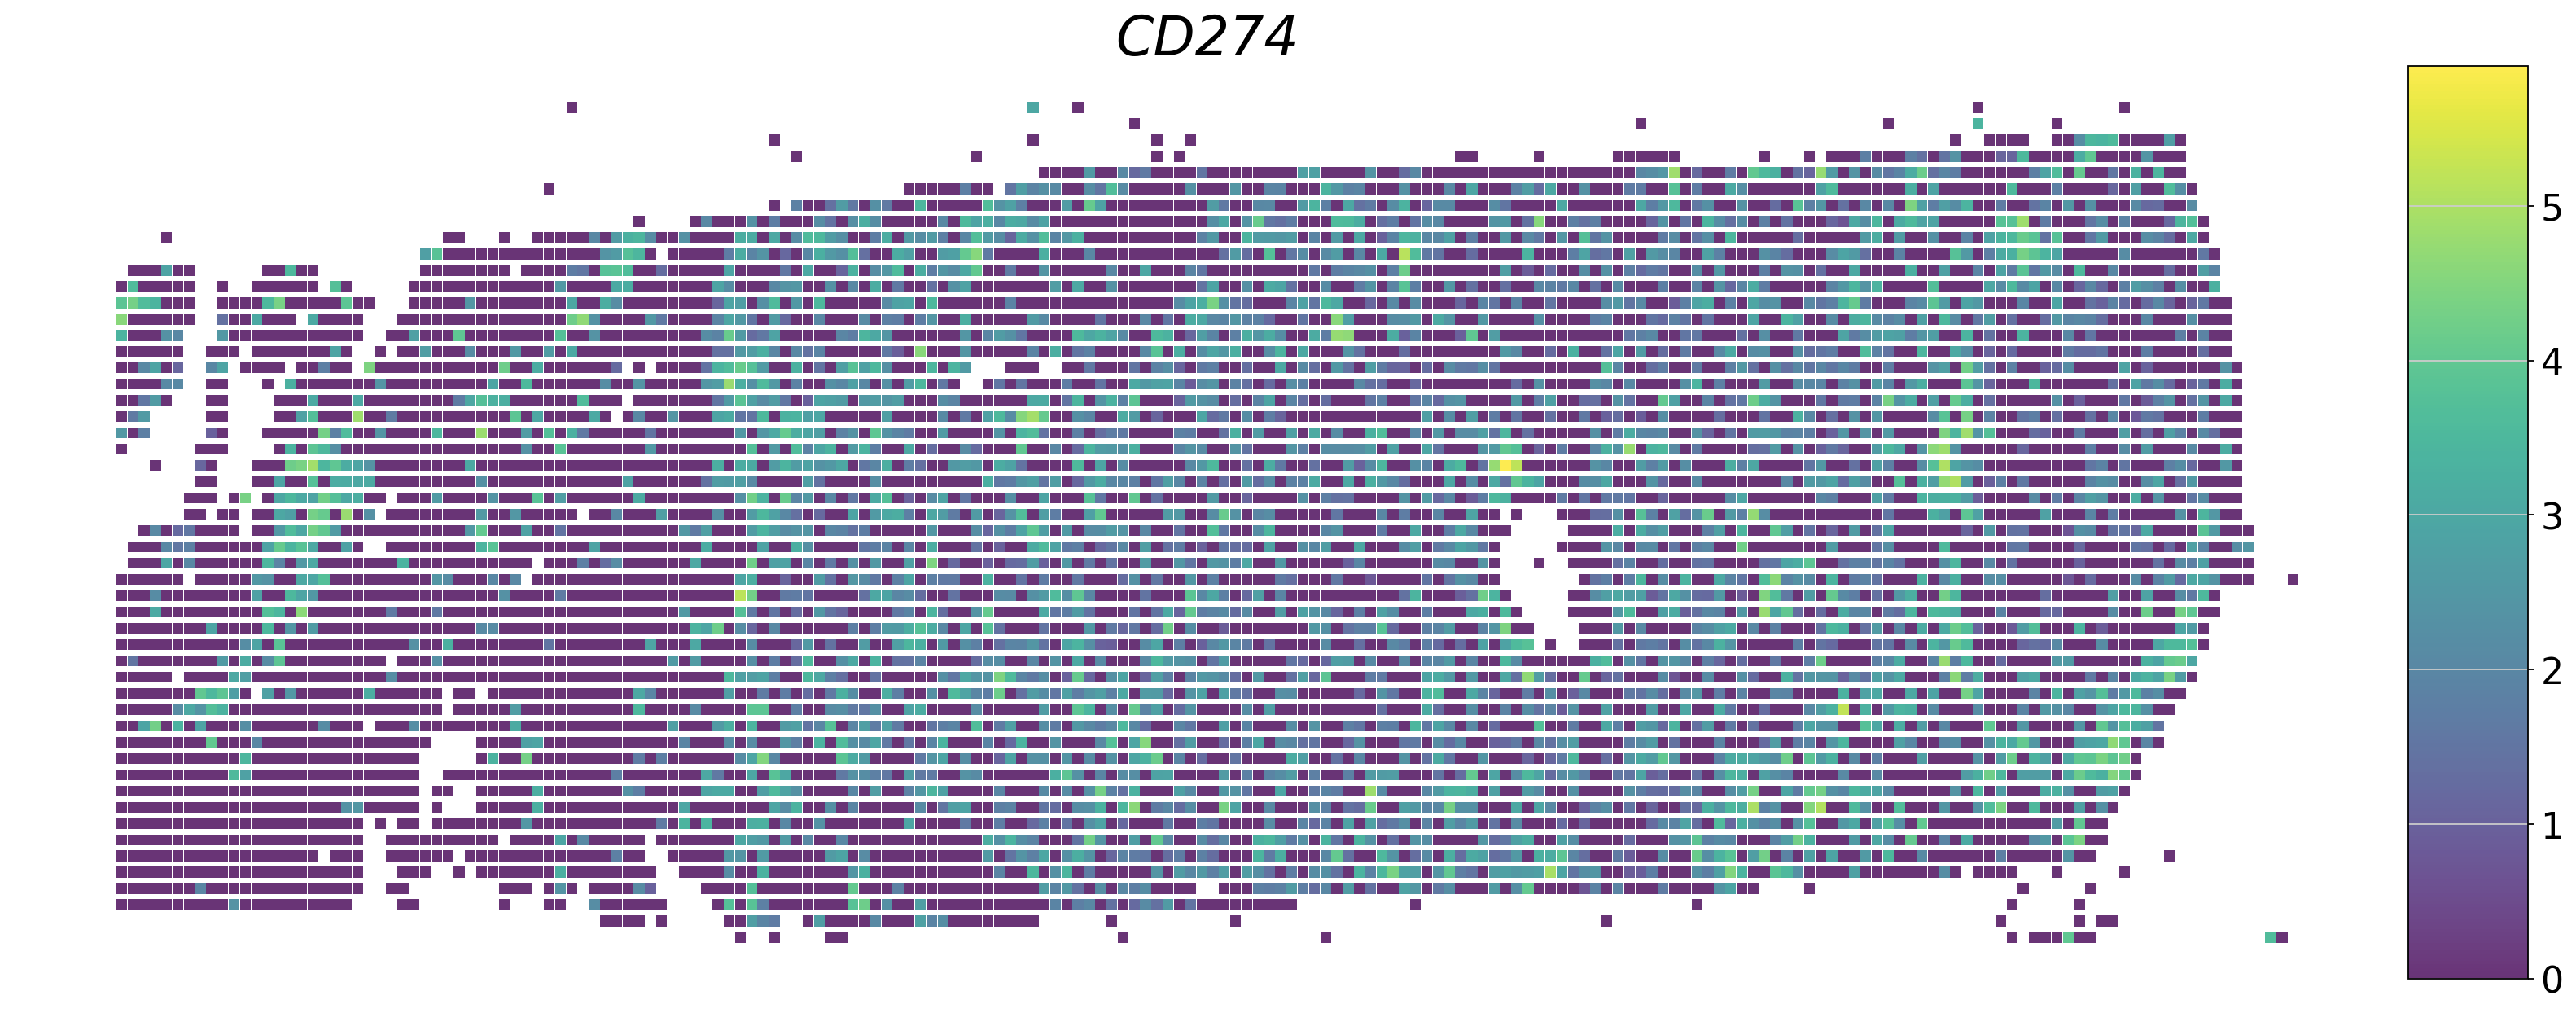

In [10]:
sp_adata.vis_spatial_imageST(feat_name='CD274', 
                             alpha = 0.8, dot_size=6, fig_size = (20,8), 
                             title_fontsize = 30, legend_fontsize = 20, 
                             save=True, return_axis=False, dpi=200)